### Setup inicial

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print('OK')

OK


In [78]:
years = ['2009', '2019']

def create_paths_for_many_years(years, file_base_name):
    paths = dict()
    for year in years:
        paths[year] = '{}/dados/{}.CSV'.format(year, file_base_name)
    return paths
    
def read_datasets_for_many_years(years, paths):
    dfs = dict()
    for year in years:
        dfs[year] = pd.read_csv(filepath_or_buffer=paths[year], sep='|', engine='python', encoding=encoding)
    return dfs

teacher_paths = create_paths_for_many_years(years, 'SUP_DOCENTE')   

encoding='ISO-8859-1'

def get_federals(df):
    public  = df[df["TP_CATEGORIA_ADMINISTRATIVA"].isin([1])]
    return public

#ies_paths = _2019_path + 'SUP_IES_2019.CSV'
#curso_paths = _2019_path + 'SUP_CURSO_2019.CSV'
#aluno_paths = _2019_path + 'SUP_ALUNO_2019.CSV'


print(teacher_paths)

{'2009': '2009/dados/SUP_DOCENTE.CSV', '2019': '2019/dados/SUP_DOCENTE.CSV'}


### teachers

In [79]:
teachers = read_datasets_for_many_years(years, teacher_paths)

In [80]:
columns = ['CO_CATEGORIA_ADMINISTRATIVA', 'CO_SITUACAO_DOCENTE', 'CO_ESCOLARIDADE_DOCENTE', 'IN_SEXO_DOCENTE', 'CO_COR_RACA_DOCENTE', 'IN_DOCENTE_DEFICIENCIA', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO']
teachers['2009'] = teachers['2009'][columns]

In [81]:
### 2009 adjusts
columns = {
    'CO_CATEGORIA_ADMINISTRATIVA': 'TP_CATEGORIA_ADMINISTRATIVA', 
    'CO_SITUACAO_DOCENTE': 'TP_SITUACAO',
    'CO_ESCOLARIDADE_DOCENTE': 'TP_ESCOLARIDADE',
    'IN_SEXO_DOCENTE': 'TP_SEXO',
    'CO_COR_RACA_DOCENTE': 'TP_COR_RACA',
    'IN_DOCENTE_DEFICIENCIA': 'IN_DEFICIENCIA'
}
teachers['2009'].rename(columns=columns, inplace=True)
teachers['2009']['NU_ANO_CENSO'] = pd.Series([2009 for x in range(len(teachers['2009'].index))])

teachers['2009']['TP_CATEGORIA_ADMINISTRATIVA'] = teachers['2009']['TP_CATEGORIA_ADMINISTRATIVA'].replace({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada', 5: 'Privada', 6: 'Privada'})
teachers['2009']['TP_SEXO'] = teachers['2009']['TP_SEXO'].replace({0: 'Masculino', 1: 'Feminino'})

teachers['2009'].head()

,TP_CATEGORIA_ADMINISTRATIVA,TP_SITUACAO,TP_ESCOLARIDADE,TP_SEXO,TP_COR_RACA,IN_DEFICIENCIA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,NU_ANO_CENSO
0,Federal,1,3,Masculino,1,0,0.0,0.0,2009
1,Federal,1,5,Feminino,1,0,0.0,0.0,2009
2,Federal,1,4,Feminino,1,0,0.0,0.0,2009
3,Federal,1,4,Masculino,6,0,0.0,0.0,2009
4,Federal,1,4,Masculino,0,0,0.0,0.0,2009


In [82]:
### 2019 adjusts

columns = ['NU_ANO_CENSO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_SITUACAO', 'TP_ESCOLARIDADE', 'TP_SEXO', 'TP_COR_RACA', 'IN_DEFICIENCIA', 'IN_BOLSA_PESQUISA', 'IN_SUBSTITUTO']
teachers['2019'] = teachers['2019'][columns]
teachers['2019']['TP_CATEGORIA_ADMINISTRATIVA'] = teachers['2019']['TP_CATEGORIA_ADMINISTRATIVA'].replace({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada', 5: 'Privada', 6: 'Privada', 7: 'Especial', 8: 'Privada', 9: 'Privada'})
teachers['2019']['TP_SEXO'] = teachers['2019']['TP_SEXO'].replace({1: 'Feminino', 2: 'Masculino'})

In [83]:
### multiple adjusts

df = pd.concat([teachers['2009'], teachers['2019']])
df['TP_SITUACAO'] = df['TP_SITUACAO'].replace({1: 'Em exercício', 2: 'Afastado para qualificação', 3: 'Afastado por outros motivos', 4: 'Afastado por outros motivos', 5: 'Afastado por outros motivos', 6: 'Falecido'})
df['TP_ESCOLARIDADE'] = df['TP_ESCOLARIDADE'].replace({1: 'Sem graduação', 2: 'Graduação', 3: 'Especialização', 4: 'Mestrado', 5: 'Doutorado'})
df['TP_COR_RACA'] = df['TP_COR_RACA'].replace({0: 'Não quis declarar', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena', 6: 'Não dispõe da informação', 9: 'Não dispõe da informação'})
df['IN_DEFICIENCIA'] = df['IN_DEFICIENCIA'].replace({0: False, 1: True, 9: None})
df['IN_BOLSA_PESQUISA'] = df['IN_BOLSA_PESQUISA'].replace({0: False, 1: True})
df['IN_SUBSTITUTO'] = df['IN_SUBSTITUTO'].replace({0: False, 1: True})

df.rename(columns={'TP_CATEGORIA_ADMINISTRATIVA': 'Categoria Administrativa', 'TP_SITUACAO': 'Situação', 'TP_ESCOLARIDADE': 'Escolaridade', 'TP_SEXO': 'Sexo', 'TP_COR_RACA': 'Raça', 'NU_ANO_CENSO': 'Ano', 'IN_DEFICIENCIA': 'Deficiência', 'IN_BOLSA_PESQUISA': 'Bolsa Pesquisa', 'IN_SUBSTITUTO': 'Substituto'}, inplace=True)

df.head()

,Categoria Administrativa,Situação,Escolaridade,Sexo,Raça,Deficiência,Bolsa Pesquisa,Substituto,Ano
0,Federal,Em exercício,Especialização,Masculino,Branca,False,False,False,2009
1,Federal,Em exercício,Doutorado,Feminino,Branca,False,False,False,2009
2,Federal,Em exercício,Mestrado,Feminino,Branca,False,False,False,2009
3,Federal,Em exercício,Mestrado,Masculino,Não dispõe da informação,False,False,False,2009
4,Federal,Em exercício,Mestrado,Masculino,Não quis declarar,False,False,False,2009


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758517 entries, 0 to 399427
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Categoria Administrativa  758517 non-null  object
 1   Situação                  758517 non-null  object
 2   Escolaridade              758517 non-null  object
 3   Sexo                      758517 non-null  object
 4   Raça                      758517 non-null  object
 5   Deficiência               715141 non-null  object
 6   Bolsa Pesquisa            470661 non-null  object
 7   Substituto                734072 non-null  object
 8   Ano                       758517 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 57.9+ MB


In [85]:
df.isna().sum()

Categoria Administrativa         0
Situação                         0
Escolaridade                     0
Sexo                             0
Raça                             0
Deficiência                  43376
Bolsa Pesquisa              287856
Substituto                   24445
Ano                              0
dtype: int64

In [86]:
def create_table_by_segregator(input_df, segregator):
    count_by_segregator_and_year = input_df.groupby(['Ano', segregator]).size().reset_index(name='Quantidade')
    total_by_year = count_by_segregator_and_year.groupby('Ano')['Quantidade'].sum()
    count_by_segregator_and_year['Porcentagem'] = count_by_segregator_and_year.apply(lambda x: (x['Quantidade'] / total_by_year[x['Ano']] * 100).round(2), axis=1)

    percentage_pivot = count_by_segregator_and_year.pivot(index=segregator, columns='Ano', values='Porcentagem')
    quantity_pivot  = count_by_segregator_and_year.pivot(index=segregator, columns='Ano', values='Quantidade')
    entities_by_segregator = pd.concat([quantity_pivot, percentage_pivot], axis=1)

    columns_tuples = [
        ('Quantidade', entities_by_segregator.columns[0]),
        ('Quantidade', entities_by_segregator.columns[1]),
        ('Porcentagem', entities_by_segregator.columns[2]),
        ('Porcentagem', entities_by_segregator.columns[3])
    ]
    columns = pd.MultiIndex.from_tuples(columns_tuples)
    entities_by_segregator.columns = columns

    quantity_evolution = entities_by_segregator['Quantidade', 2019] - entities_by_segregator['Quantidade', 2009]
    percentage_evolution = entities_by_segregator['Porcentagem', 2019] - entities_by_segregator['Porcentagem', 2009]

    entities_by_segregator[('Quantidade', 'Evolução')] = quantity_evolution
    entities_by_segregator[('Porcentagem', 'Evolução (%)')] = percentage_evolution

    new_columns_order = [
        ('Quantidade', 2009),
        ('Quantidade', 2019),
        ('Quantidade', 'Evolução'),
        ('Porcentagem', 2009),
        ('Porcentagem', 2019),
        ('Porcentagem', 'Evolução (%)')
    ]

    entities_by_segregator = entities_by_segregator[new_columns_order]
    entities_by_segregator.index.name = segregator

    reseted_entities_by_segregator = entities_by_segregator.reset_index()
    entities_evolution_by_segregator = pd.DataFrame({segregator: reseted_entities_by_segregator[segregator], 'Evolução': reseted_entities_by_segregator[('Quantidade', 'Evolução')], 'Evolução (%)': reseted_entities_by_segregator[('Porcentagem', 'Evolução (%)')]})
    entities_evolution_by_segregator

    return entities_by_segregator, entities_evolution_by_segregator, count_by_segregator_and_year

def plot_comparison_graph(count_by_segregator_and_year_df, segregator, spacing = 0.5, label_rotation = 0, horizontalalignment = 'center'):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    plt.subplots_adjust(wspace=spacing, hspace=spacing)
    
    graphs = []

    graphs.append(sns.barplot(x=segregator, y="Quantidade", hue="Ano", data=count_by_segregator_and_year_df, ax=axs[0, 0]))
    graphs.append(sns.barplot(x=segregator, y="Porcentagem", hue="Ano", data=count_by_segregator_and_year_df, ax=axs[0,1]))

    graphs.append(sns.lineplot(x="Ano", y="Quantidade", hue=segregator, data=count_by_segregator_and_year_df, ax=axs[1,0]))
    graphs.append(sns.lineplot(x="Ano", y="Porcentagem", hue=segregator, data=count_by_segregator_and_year_df, ax=axs[1,1]))

    for graph in graphs:
        graph.set_xticklabels(graph.get_xticklabels(), rotation=label_rotation, horizontalalignment=horizontalalignment)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

def plot_evolution_graph(entities_evolution_by_segregator, segregator, spacing = 0.5, label_rotation = 0, horizontalalignment = 'center'):
    fig, axs = plt.subplots(ncols=2, figsize=(10,4))
    plt.subplots_adjust(wspace=spacing, hspace=spacing)

    graphs = []
    graphs.append(sns.barplot(x=segregator, y='Evolução', data=entities_evolution_by_segregator, ax=axs[0]))
    graphs.append(sns.barplot(x=segregator, y='Evolução (%)', data=entities_evolution_by_segregator, ax=axs[1]))
    
    for graph in graphs:
        graph.set_xticklabels(graph.get_xticklabels(), rotation=label_rotation, horizontalalignment=horizontalalignment)

    plt.show()


## Qual a presença de docentes por raça?

In [87]:
race_input_df = df[(df['Situação'] == 'Em exercício') & (df['Raça'] != 'Não dispõe da informação') & (df['Raça'] != 'Não quis declarar')]
teachers_by_race, teachers_evolution_by_race, count_by_race_and_year = create_table_by_segregator(race_input_df, 'Raça')

In [88]:
count_by_race_and_year

,Ano,Raça,Quantidade,Porcentagem
0,2009,Amarela,2607,1.26
1,2009,Branca,166797,80.89
2,2009,Indígena,443,0.21
3,2009,Parda,32293,15.66
4,2009,Preta,4057,1.97
5,2019,Amarela,3941,1.44
6,2019,Branca,204072,74.76
7,2019,Indígena,494,0.18
8,2019,Parda,56662,20.76
9,2019,Preta,7816,2.86


In [89]:
teachers_by_race

Quantidade                  Porcentagem                    
               2009    2019 Evolução        2009   2019 Evolução (%)
Raça                                                                
Amarela        2607    3941     1334        1.26   1.44         0.18
Branca       166797  204072    37275       80.89  74.76        -6.13
Indígena        443     494       51        0.21   0.18        -0.03
Parda         32293   56662    24369       15.66  20.76         5.10
Preta          4057    7816     3759        1.97   2.86         0.89

In [90]:
teachers_evolution_by_race

,Raça,Evolução,Evolução (%)
0,Amarela,1334,0.18
1,Branca,37275,-6.13
2,Indígena,51,-0.03
3,Parda,24369,5.10
4,Preta,3759,0.89


C:\Users\Workstation\AppData\Local\Temp\ipykernel_5364\3275997235.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(), rotation=label_rotation, horizontalalignment=horizontalalignment)


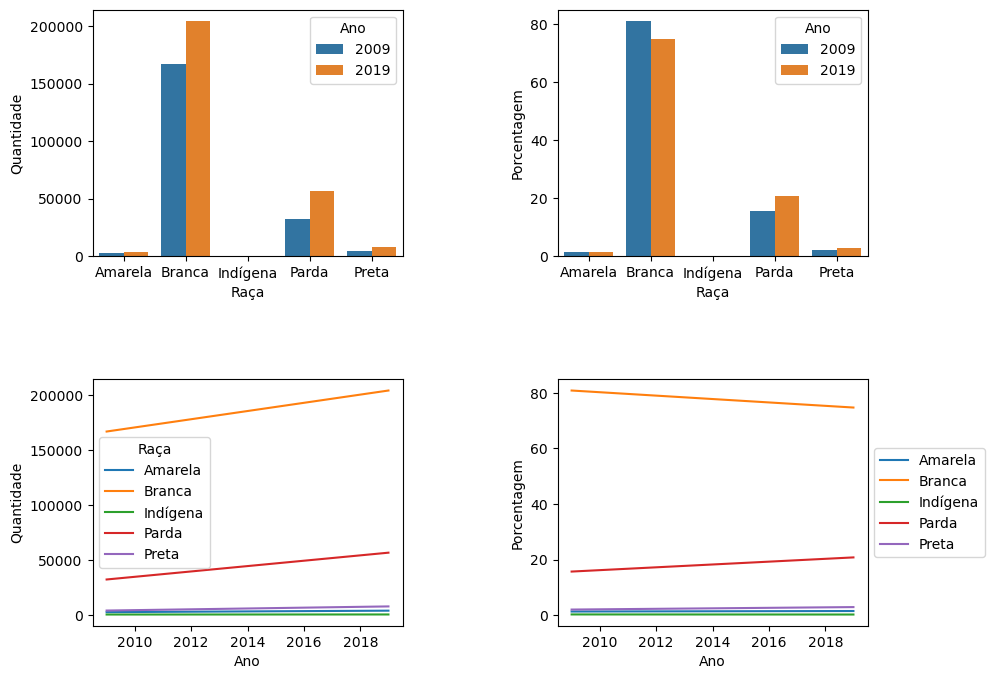

In [91]:
plot_comparison_graph(count_by_race_and_year, 'Raça')

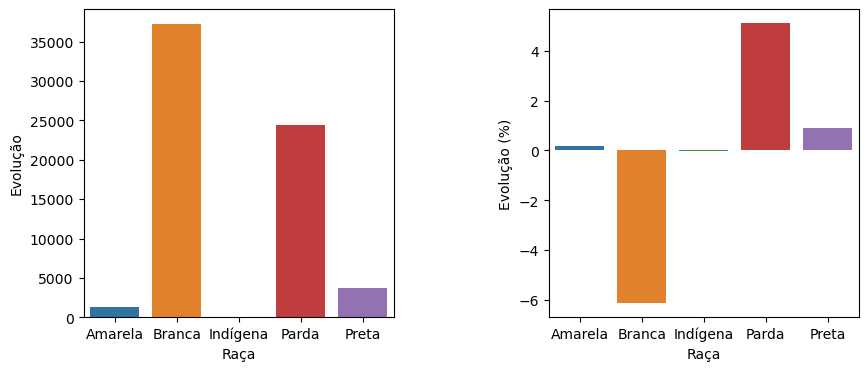

In [92]:
plot_evolution_graph(teachers_evolution_by_race, 'Raça')

## Qual a presença de docentes por escolaridade?

In [93]:
scolarship_input_df = df[(df['Situação'] == 'Em exercício') & (df['Escolaridade'] != 'Sem graduação')]
teachers_by_scolarship, teachers_evolution_by_scolarship, count_by_scolarship_and_year = create_table_by_segregator(scolarship_input_df, 'Escolaridade')

In [94]:
count_by_scolarship_and_year

,Ano,Escolaridade,Quantidade,Porcentagem
0,2009,Doutorado,89850,26.38
1,2009,Especialização,99406,29.18
2,2009,Graduação,27921,8.20
3,2009,Mestrado,123466,36.24
4,2019,Doutorado,177017,45.85
5,2019,Especialização,60690,15.72
6,2019,Graduação,3479,0.90
7,2019,Mestrado,144874,37.53


In [95]:
teachers_by_scolarship

Quantidade                  Porcentagem                    
                     2009    2019 Evolução        2009   2019 Evolução (%)
Escolaridade                                                              
Doutorado           89850  177017    87167       26.38  45.85        19.47
Especialização      99406   60690   -38716       29.18  15.72       -13.46
Graduação           27921    3479   -24442        8.20   0.90        -7.30
Mestrado           123466  144874    21408       36.24  37.53         1.29

In [96]:
teachers_evolution_by_scolarship

,Escolaridade,Evolução,Evolução (%)
0,Doutorado,87167,19.47
1,Especialização,-38716,-13.46
2,Graduação,-24442,-7.30
3,Mestrado,21408,1.29


C:\Users\Workstation\AppData\Local\Temp\ipykernel_5364\3275997235.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(), rotation=label_rotation, horizontalalignment=horizontalalignment)


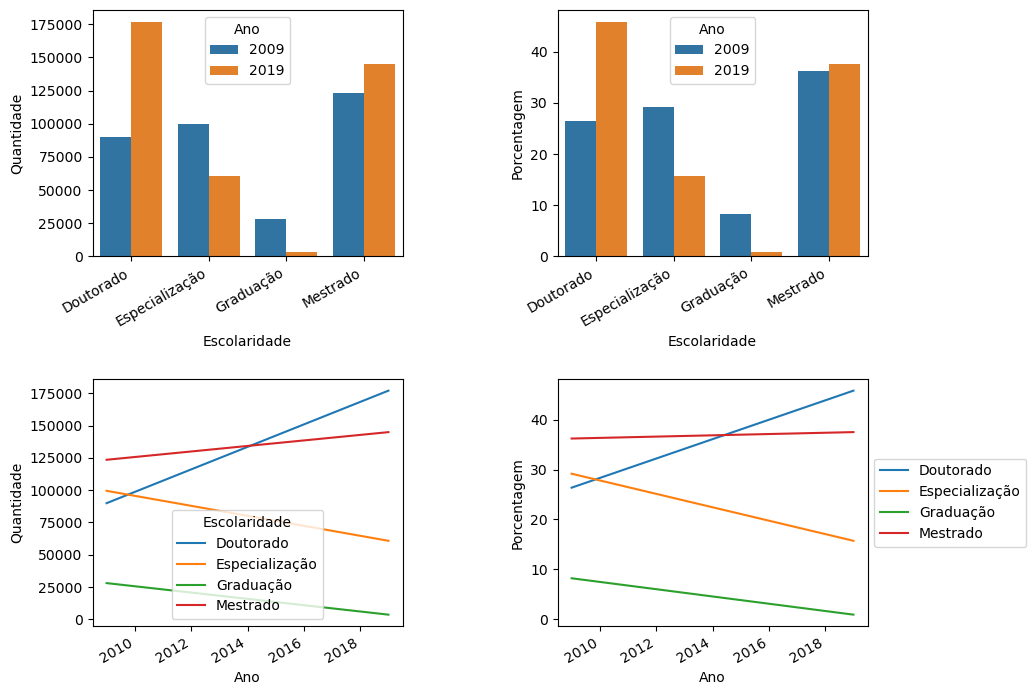

In [97]:
plot_comparison_graph(count_by_scolarship_and_year, 'Escolaridade', label_rotation=30, horizontalalignment='right')

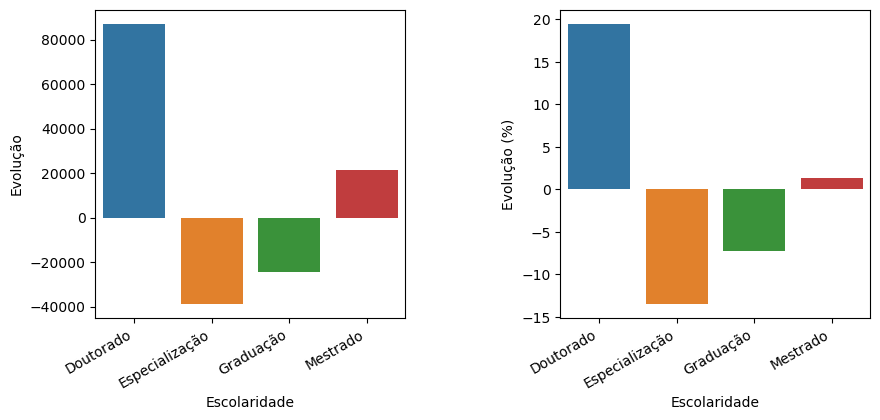

In [98]:
plot_evolution_graph(teachers_evolution_by_scolarship, 'Escolaridade', label_rotation = 30, horizontalalignment='right')

## Qual a presença de docentes por categoria administrativa?

In [99]:
administrative_category_input_df = df[(df['Situação'] == 'Em exercício') & (df['Categoria Administrativa'] != 'Especial')]
teachers_by_administrative_category, teachers_evolution_by_administrative_category, count_by_administrative_category_and_year = create_table_by_segregator(administrative_category_input_df, 'Categoria Administrativa')

In [100]:
count_by_administrative_category_and_year

,Ano,Categoria Administrativa,Quantidade,Porcentagem
0,2009,Estadual,43145,12.66
1,2009,Federal,72228,21.19
2,2009,Municipal,7604,2.23
3,2009,Privada,217840,63.92
4,2019,Estadual,49437,12.86
5,2019,Federal,120497,31.35
6,2019,Municipal,4702,1.22
7,2019,Privada,209670,54.56


In [101]:
teachers_by_administrative_category

Quantidade                  Porcentagem         \
                               2009    2019 Evolução        2009   2019   
Categoria Administrativa                                                  
Estadual                      43145   49437     6292       12.66  12.86   
Federal                       72228  120497    48269       21.19  31.35   
Municipal                      7604    4702    -2902        2.23   1.22   
Privada                      217840  209670    -8170       63.92  54.56   

                                       
                         Evolução (%)  
Categoria Administrativa               
Estadual                         0.20  
Federal                         10.16  
Municipal                       -1.01  
Privada                         -9.36

In [102]:
teachers_evolution_by_administrative_category

,Categoria Administrativa,Evolução,Evolução (%)
0,Estadual,6292,0.20
1,Federal,48269,10.16
2,Municipal,-2902,-1.01
3,Privada,-8170,-9.36


C:\Users\Workstation\AppData\Local\Temp\ipykernel_5364\3275997235.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(), rotation=label_rotation, horizontalalignment=horizontalalignment)


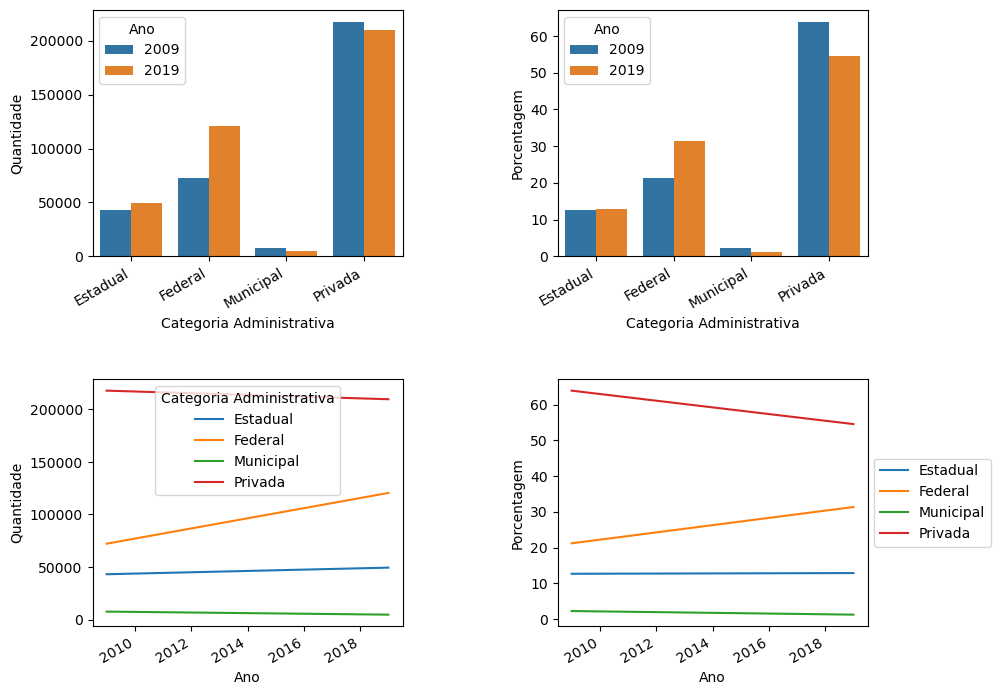

In [103]:
plot_comparison_graph(count_by_administrative_category_and_year, 'Categoria Administrativa', label_rotation=30, horizontalalignment='right')

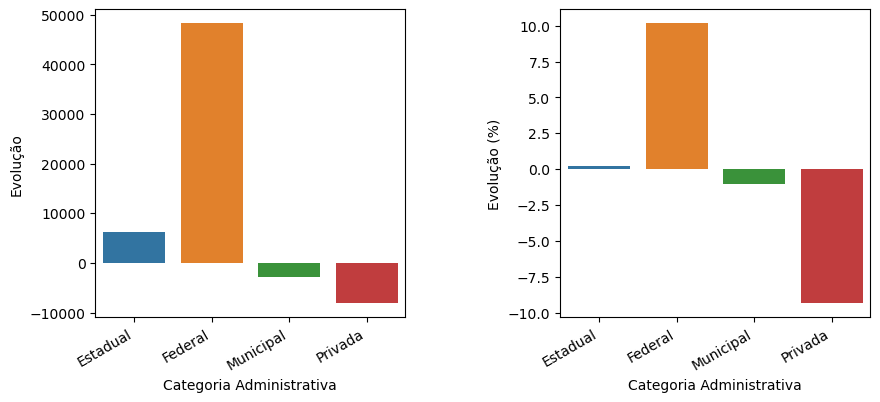

In [104]:
plot_evolution_graph(teachers_evolution_by_administrative_category, 'Categoria Administrativa', label_rotation = 30, horizontalalignment='right')

## Qual a presença de docentes com bolsa de pesquisa?

In [125]:
research_grant_df = df[(df['Situação'] == 'Em exercício')]
teachers_by_research_grant, teachers_evolution_by_research_grant, count_by_research_grant_and_year = create_table_by_segregator(research_grant_df, 'Bolsa Pesquisa')

In [126]:
count_by_research_grant_and_year

,Ano,Bolsa Pesquisa,Quantidade,Porcentagem
0,2009,False,329399,96.65
1,2009,True,11405,3.35
2,2019,False,104635,85.29
3,2019,True,18040,14.71


In [127]:
teachers_by_research_grant

Quantidade                  Porcentagem                    
                     2009    2019 Evolução        2009   2019 Evolução (%)
Bolsa Pesquisa                                                            
False              329399  104635  -224764       96.65  85.29       -11.36
True                11405   18040     6635        3.35  14.71        11.36

In [128]:
teachers_evolution_by_research_grant

,Bolsa Pesquisa,Evolução,Evolução (%)
0,False,-224764,-11.36
1,True,6635,11.36


C:\Users\Workstation\AppData\Local\Temp\ipykernel_5364\3275997235.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(), rotation=label_rotation, horizontalalignment=horizontalalignment)


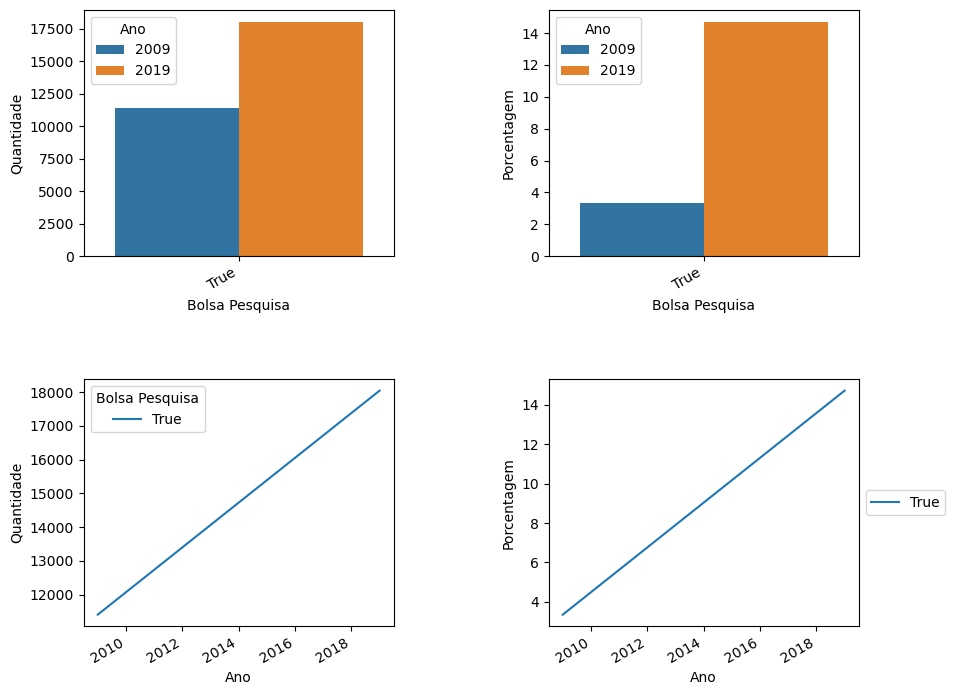

In [129]:
plot_comparison_graph(count_by_research_grant_and_year[(count_by_research_grant_and_year['Bolsa Pesquisa'] == True)], 'Bolsa Pesquisa', label_rotation=30, horizontalalignment='right')

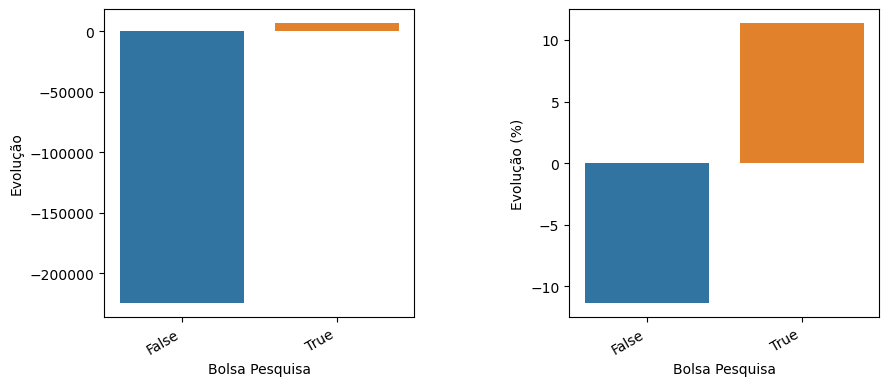

In [130]:
plot_evolution_graph(teachers_evolution_by_research_grant, 'Bolsa Pesquisa', label_rotation = 30, horizontalalignment='right')

## Qual a presença de docentes deficientes?

In [144]:
deficiency_df = df[(df['Situação'] == 'Em exercício')]
teachers_by_deficiency, teachers_evolution_by_deficiency, count_by_deficiency_and_year = create_table_by_segregator(research_grant_df, 'Deficiência')

In [145]:
count_by_deficiency_and_year

,Ano,Deficiência,Quantidade,Porcentagem
0,2009,False,339859,99.72
1,2009,True,958,0.28
2,2019,False,342705,99.52
3,2019,True,1667,0.48


In [146]:
teachers_by_deficiency

Quantidade                  Porcentagem                    
                  2009    2019 Evolução        2009   2019 Evolução (%)
Deficiência                                                            
False           339859  342705     2846       99.72  99.52         -0.2
True               958    1667      709        0.28   0.48          0.2

In [147]:
teachers_evolution_by_deficiency

,Deficiência,Evolução,Evolução (%)
0,False,2846,-0.2
1,True,709,0.2


C:\Users\Workstation\AppData\Local\Temp\ipykernel_5364\3275997235.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(), rotation=label_rotation, horizontalalignment=horizontalalignment)


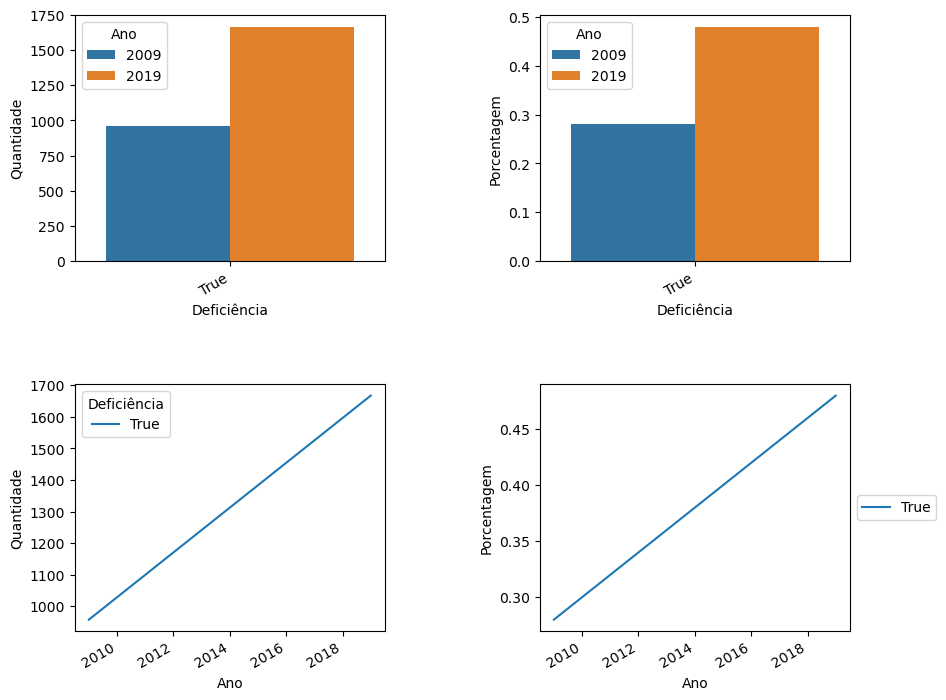

In [148]:
plot_comparison_graph(count_by_deficiency_and_year[(count_by_deficiency_and_year['Deficiência'] == True)], 'Deficiência', label_rotation=30, horizontalalignment='right')

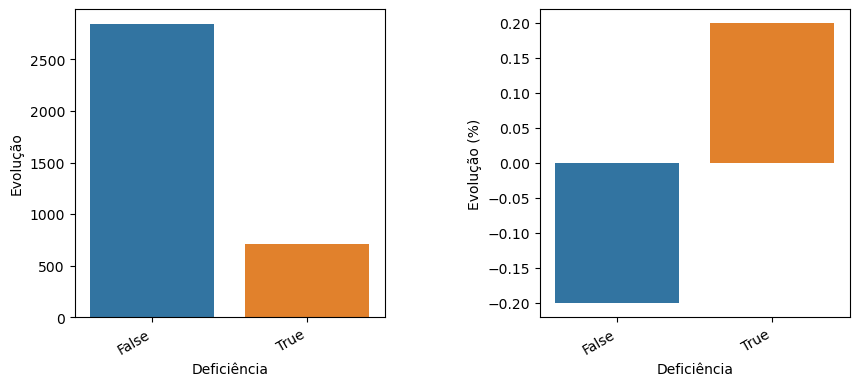

In [149]:
plot_evolution_graph(teachers_evolution_by_deficiency, 'Deficiência', label_rotation = 30, horizontalalignment='right')